# Final Results - <b>General Results</b>


In [1]:
### IMPORT LIBRARIES ###
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D  
import VTP_tools
import h5_tools
import qgrid

### FIGURE STYLE ###
sns.set()
sns.set_context("notebook")
from jupyterthemes import jtplot
jtplot.style()

In [2]:
reload(h5_tools)

### EXTRACT DATA FROM H5 FILE ###
sim_numbers = range(0, 5)
data = h5_tools.geth5Data(sim_numbers, path = 'AON_FON/pstudy/')

qgrid_widget = qgrid.show_grid(data)
qgrid_widget

/home/ines/python_envs/generic/lib/python2.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


UWdyaWRXaWRnZXQoZ3JpZF9vcHRpb25zPXsnaGlnaGxpZ2h0U2VsZWN0ZWRSb3cnOiBUcnVlLCAnZnVsbFdpZHRoUm93cyc6IFRydWUsICdyb3dIZWlnaHQnOiAyOCwgJ2VuYWJsZUNvbHVtblLigKY=


## Displacement of the cell - How much do cells migrate?

In [18]:
### READ VTP INTO A DATAFRAME ###
nodesData = VTP_tools.getNodesData([0, 350, 700], 'AON_FON/extract_files/sample_20/')

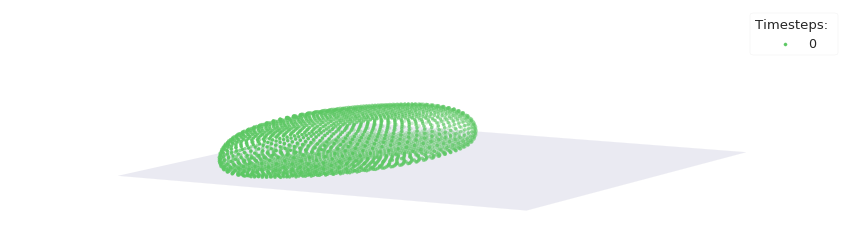

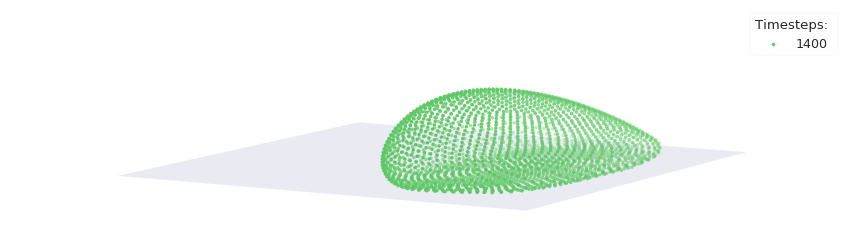

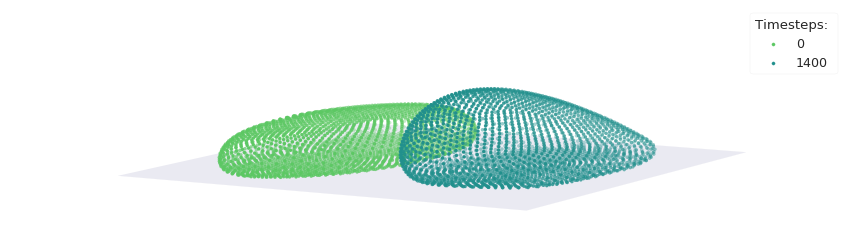

In [40]:
### PLOT NODES DATA ###

VTP_tools.plotNodes3DOverlapped(nodesData, [0])
VTP_tools.plotNodes3DOverlapped(nodesData, [700])
VTP_tools.plotNodes3DOverlapped(nodesData, [0,700])

VTP_tools.py:123: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.scatterplot(nodesData[nodesData['y'] <= 0][nodesData['time'] == time]['x'],
VTP_tools.py:124: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nodesData[nodesData['y'] <= 0][nodesData['time'] == time]['z'], label = time*2, s = 12)


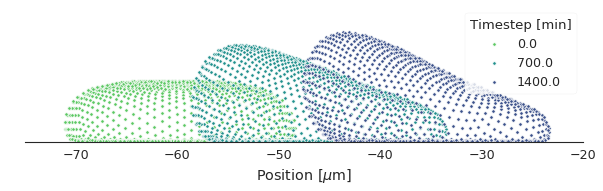

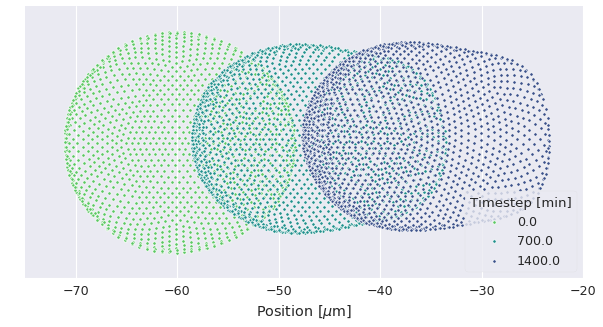

In [11]:
### PLOT NODES DATA ###
VTP_tools.plotNodes2DOverlapped(nodesData, view='XZ')
VTP_tools.plotNodes2DOverlapped(nodesData)

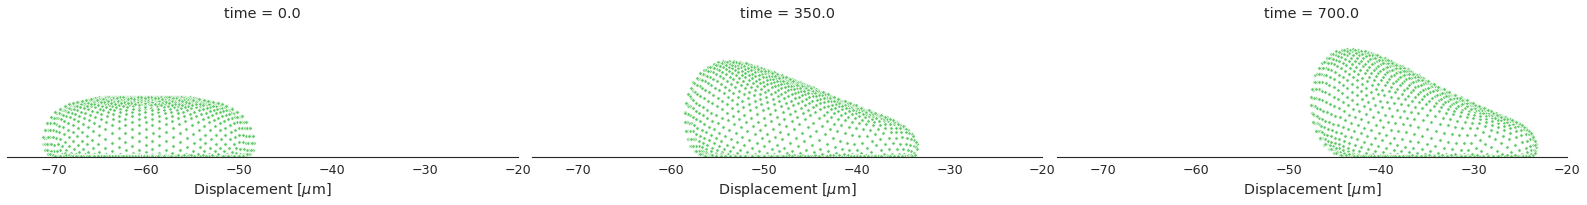

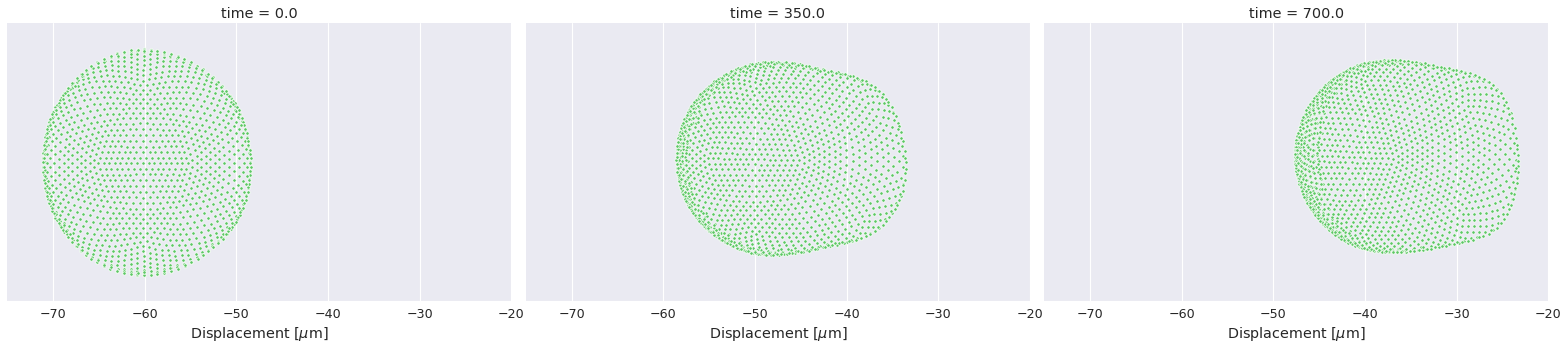

In [26]:
### PLOT NODES DATA ###
nodesData = VTP_tools.getNodesData([0, 350, 700], 'AON_FON/extract_files/sample_20/')

VTP_tools.plotNodes2DSubplots(nodesData, view='XZ')
VTP_tools.plotNodes2DSubplots(nodesData)

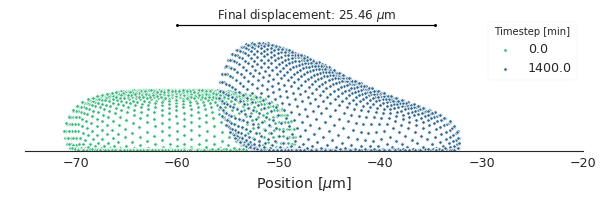

In [21]:
### PLOT FINAL DISPLACEMENT - SAMPLE 21 ###

VTP_tools.plotFinalDisp(nodesData, data, 20)

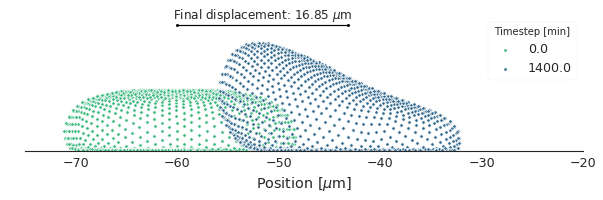

In [20]:
### PLOT FINAL DISPLACEMENT - SAMPLE 11 ###
nodesData = VTP_tools.getNodesData([0, 350, 700], 'AON_FON/extract_files/sample_11/')

VTP_tools.plotFinalDisp(nodesData, data, 11)

### Final Displacement 
The final displacement of the cell will be used to compare different samples on their ability to migrate. Three types of plots will be generated:

<Figure size 1440x720 with 0 Axes>

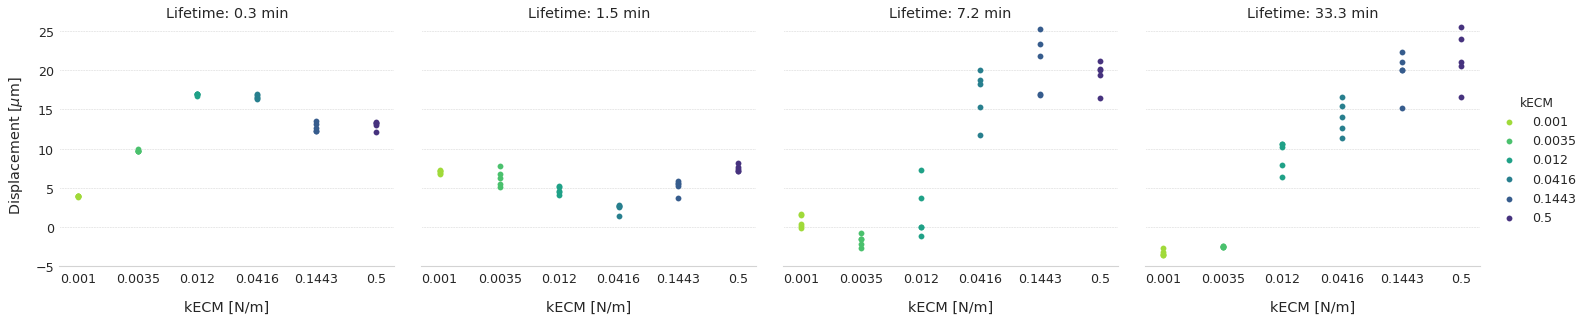

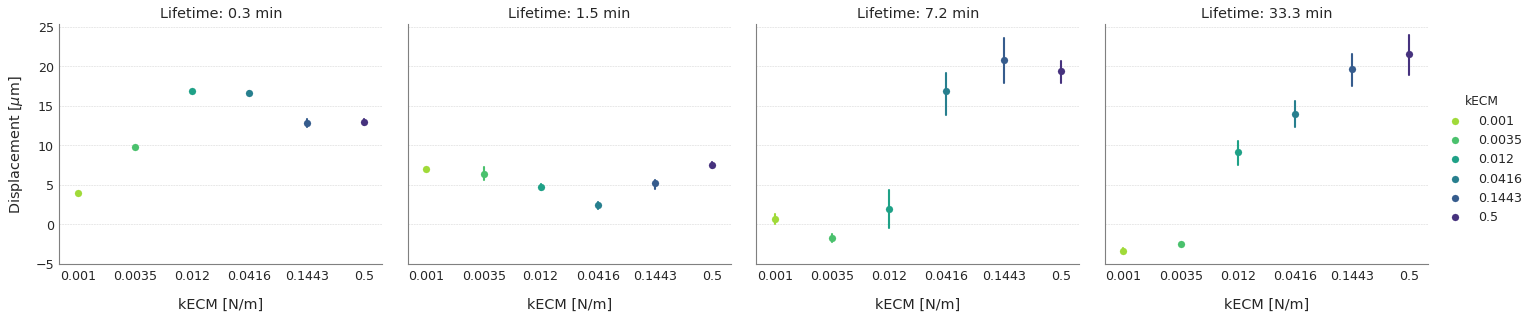

In [16]:
### PLOT DISPLACEMENT - FINAL VALUE ###
plt.figure(figsize = (20, 10))
sns.set_style("white")
sns.set_palette('viridis_r',6)

my_xticks = [0.001, 0.0035, 0.012, 0.0416, 0.1443, 0.5]

g = sns.FacetGrid(data[709::710], col = "lt_FA0", hue = "kECM",  aspect=1.15, size = 5, gridspec_kws={"wspace":0.08})

g = (g.map(plt.scatter, "log_kECM", "final_disp")
    .set(xticks = np.log10(my_xticks))
    .add_legend()
    .set(ylim=(-5,26))
    .set_xticklabels(my_xticks)
    .set_titles("Lifetime: {col_name} min")
    .set_ylabels("Displacement [$\mu$m]", labelpad=10)
    .set_xlabels("kECM [N/m]", labelpad=15))

for i in range(0,4):
    g.axes.flatten()[i].yaxis.grid(color='lightgray', linestyle='--', linewidth=0.5)
    g.axes.flatten()[i].spines.values()[0].set_edgecolor('white')
    g.axes.flatten()[i].spines.values()[2].set_edgecolor('lightgray')

plt.subplots_adjust(top = 0.8)
#g.fig.suptitle('Scatter plot of the final displacement of the cell for all 5 simulations', weight = 'bold')

ax = sns.lmplot(data = data[709::710], x = "log_kECM", y = "final_disp", col = "lt_FA0", hue = "kECM", fit_reg = False, x_estimator = np.mean)
ax.set(xticks = np.log10(my_xticks))
ax.set_titles("Lifetime: {col_name} min")
ax.set_xticklabels(my_xticks)
plt.subplots_adjust(top = 0.8)
ax.set_xlabels('kECM [N/m]', labelpad=15)
ax.set_ylabels('Displacement [$\mu$m]', labelpad=10)

for i in range(0,4):
    ax.axes.flatten()[i].yaxis.grid(color='lightgray', linestyle='--', linewidth=0.5)
    ax.axes.flatten()[i].spines.values()[0].set_edgecolor('gray')
    ax.axes.flatten()[i].spines.values()[2].set_edgecolor('gray')
    
plt.subplots_adjust(wspace=0.08)
#plt.suptitle('Mean and SEM of the final displacement of the 5 simulations', weight = 'bold')

## Types of displacement plots - How do cells migrate?